# Example of modelled spectrum with the TAR
(Traditional Approximation of Rotation)

Let us build the spectum of a γ Doradus star with a buoyancy radius of 3900 s and a rotation period of 1 day

In [2]:
import matplotlib.pyplot as plt
from seispack import *
rot=Freq(1.,'d')
Pi0=Freq(3900.,'s')
eps=0.5

We generate 3 sets of modes `k1`, `k2`, and `r2`, respectively Kelvin modes (l=1, m=-1), (l=2, m=-2), and Rossby modes (m=1, k=-2) from radial orders between 50 and 100. The sets are instances of the ModeSet class.

In [4]:
k1=generate_aTAR(Pi0, rot, eps, n=(50,100), m=-1, l=1) #Kelvin modes m=-1
k2=generate_aTAR(Pi0, rot, eps, n=(50,100), m=-2, l=2) #Kelvin modes m=-2
r2=generate_aTAR(Pi0, rot, eps, n=(50,100), m=1, k=-2) #Rossby modes m=1, k=-2

It is possible to gather of the modes in a unique ModeSet

In [6]:
modes=ModeSet((k1,k2,r2))

modes

ModeSet([(50,1,-1) 1.8568e+05 s (corot),
(51,1,-1) 1.8958e+05 s (corot),
(52,1,-1) 1.9349e+05 s (corot),
   ⋮
(98,-1,1) 1.1629e+06 s (corot),
(99,-1,1) 1.1746e+06 s (corot),
(100,-1,1) 1.1862e+06 s (corot)])

The modes have been generated in the corotating frame. It is possible to change the frame and express frequencies in the inertial frame with the method `to_frame`.

In [8]:
modes.to_frame('in')

modes

ModeSet([(50,1,-1) 58963 s,
(51,1,-1) 59352 s,
(52,1,-1) 59729 s,
   ⋮
(98,-1,1) 93334 s,
(99,-1,1) 93260 s,
(100,-1,1) 93188 s])

The method `getv` return an array of the modes frequency (or period). We can specify a unit (hereafter second 's' or micro-Hertz 'muHz'). We can also specify a frame (corotating 'co' or inertial 'in').

In [10]:
P1=k1.getv('s','in')
DP1=P1[1:]-P1[:-1] # period spacing in second
nu1=k1[1:].getv('muHz','in')

P2=k2.getv('s','in')
DP2=P2[1:]-P2[:-1]
nu2=k2[1:].getv('muHz','in')

Pr=r2[::-1].getv('s','in')
DPr=Pr[1:]-Pr[:-1]
nur=r2[:0:-1].getv('muHz','in')

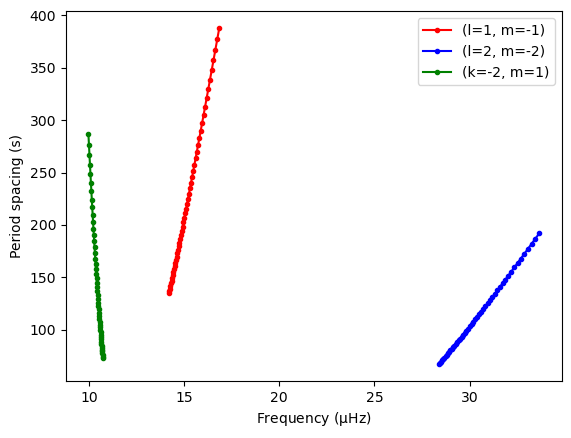

In [11]:
plt.plot(nu1,DP1,c='red',marker='.',label='(l=1, m=-1)')
plt.plot(nu2,DP2,c='blue',marker='.',label='(l=2, m=-2)')
plt.plot(nur,DPr,c='green',marker='.',label='(k=-2, m=1)')
plt.xlabel(r'Frequency ($\mathrm{\mu Hz}$)')
plt.ylabel('Period spacing (s)')
plt.legend()